In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Loading and Inspecting Data

In [22]:
#Importing The Dataset
df = pd.read_csv(r"C:\Users\dimma\OneDrive\Υπολογιστής\Ο.Π.Α\Python\Ασκησεις\Final Project\bank_customer_analytics.csv")
df.sample(10)


,CustomerID,Age,Gender,MaritalStatus,Income,Savings,CreditScore,LoanAmount,LoanStatus,AccountType,YearsWithBank,Churn
730,C0731,35.0,Male,married,40000.0,15000.0,NaN,50000.0,defaulted,investment,10.0,no
2026,C2027,45.0,male,married,80000.0,25000.0,750.0,40000.0,approved,investment,10.0,no
373,C0374,NaN,female,single,60000.0,10000.0,750.0,50000.0,approved,joint,5.0,no
2730,C2731,25.0,female,married,60000.0,20000.0,NaN,30000.0,approved,savings,NaN,no
456,C0457,45.0,female,married,100000.0,10000.0,700.0,20000.0,approved,savings,2.0,yes
133,C0134,25.0,female,single,60000.0,10000.0,600.0,30000.0,defaulted,checking,2.0,no
2205,C2206,35.0,Male,single,60000.0,15000.0,NaN,30000.0,approved,savings,NaN,no
2951,C2952,25.0,female,married,80000.0,NaN,750.0,40000.0,approved,checking,2.0,no
975,C0976,35.0,FEMALE,single,40000.0,10000.0,600.0,20000.0,approved,checking,5.0,yes
67,C0068,45.0,FEMALE,married,100000.0,100000.0,650.0,30000.0,approved,savings,5.0,yes


In [23]:
#dropping the CustomerId column. It also seems a problem with different inputs in column Gender e.g.FEMALE,female,male,Male
df = df.drop(columns=['CustomerID'])


In [26]:
df['Gender'].value_counts()

Gender
female    889
male      871
FEMALE    632
Male      608
Name: count, dtype: int64

In [25]:
#Replacing the Churn column with Stayed for no & Left for yes
df['Churn'] = df['Churn'].replace('no' , 'Stayed')
df['Churn'] = df['Churn'].replace('yes', 'Left')


In [6]:
df['Churn'].value_counts()

Churn
Stayed    2094
Left       906
Name: count, dtype: int64

In [27]:
#Change the input only to Male, Female
df['Gender'] = df['Gender'].replace(['female','FEMALE'], 'Female')
df['Gender'] = df['Gender'].replace(['male','MALE'], 'Male')

In [28]:
df['Gender'].value_counts()

Gender
Female    1521
Male      1479
Name: count, dtype: int64

In [29]:
#checking our column name for any a possible renaming. Seems Ok
column_list = list(df.columns)
print(column_list)


['Age', 'Gender', 'MaritalStatus', 'Income', 'Savings', 'CreditScore', 'LoanAmount', 'LoanStatus', 'AccountType', 'YearsWithBank', 'Churn']


In [30]:
df.info() #Checking the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            2838 non-null   float64
 1   Gender         3000 non-null   object 
 2   MaritalStatus  3000 non-null   object 
 3   Income         2865 non-null   float64
 4   Savings        2854 non-null   float64
 5   CreditScore    2857 non-null   float64
 6   LoanAmount     2867 non-null   float64
 7   LoanStatus     3000 non-null   object 
 8   AccountType    3000 non-null   object 
 9   YearsWithBank  2713 non-null   float64
 10  Churn          3000 non-null   object 
dtypes: float64(6), object(5)
memory usage: 257.9+ KB


In [31]:
#checking the null values. The missing values look small
df.isnull().sum()

Age              162
Gender             0
MaritalStatus      0
Income           135
Savings          146
CreditScore      143
LoanAmount       133
LoanStatus         0
AccountType        0
YearsWithBank    287
Churn              0
dtype: int64

In [32]:
#checking for duplicated rows
df.loc[df.duplicated()]

,Age,Gender,MaritalStatus,Income,Savings,CreditScore,LoanAmount,LoanStatus,AccountType,YearsWithBank,Churn
1377,35.0,Male,married,60000.0,15000.0,700.0,40000.0,rejected,savings,5.0,Stayed
1428,35.0,Male,single,80000.0,10000.0,750.0,20000.0,approved,checking,10.0,Left
2103,25.0,Female,single,80000.0,10000.0,650.0,40000.0,defaulted,savings,5.0,Stayed
2383,45.0,Male,single,100000.0,15000.0,700.0,20000.0,approved,savings,10.0,Left


In [33]:
df.describe() #Checking the basic statistics

,Age,Income,Savings,CreditScore,LoanAmount,YearsWithBank
count,2838.000000,2865.000000,2854.000000,2857.000000,2867.000000,2713.000000
mean,39.048626,68293.193717,21483.882270,694.662233,34080.920823,6.883155
std,9.816456,19997.850070,20893.054327,68.907793,9972.978607,5.907284
min,25.000000,40000.000000,5000.000000,600.000000,20000.000000,1.000000
25%,35.000000,60000.000000,10000.000000,650.000000,30000.000000,2.000000
50%,35.000000,60000.000000,15000.000000,700.000000,30000.000000,5.000000
75%,45.000000,80000.000000,20000.000000,750.000000,40000.000000,10.000000
max,55.000000,100000.000000,200000.000000,800.000000,50000.000000,100.000000


In [34]:
(df.select_dtypes(include='number')    #checking the mean vs median to find the proper value to impute in the null values.
   .agg(['mean', 'median', 'std'])
   .round(2)
   .T
   .assign(diff_mean_median = lambda x: x['mean'] - x['median'])
   .sort_values(by='diff_mean_median', key=abs, ascending=False))

,mean,median,std,diff_mean_median
Income,68293.19,60000.0,19997.85,8293.19
Savings,21483.88,15000.0,20893.05,6483.88
LoanAmount,34080.92,30000.0,9972.98,4080.92
CreditScore,694.66,700.0,68.91,-5.34
Age,39.05,35.0,9.82,4.05
YearsWithBank,6.88,5.0,5.91,1.88


In [35]:
#Imputing the null numeric values with the median since its the better choice
numeric_cols = ['Age', 'Income', 'Savings', 'CreditScore', 'LoanAmount', 'YearsWithBank']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Feature Understanding and Selection - Univariate Analysis

In [51]:
df.columns # print the columns so we do not go back and forth

Index(['Age', 'Gender', 'MaritalStatus', 'Income', 'Savings', 'CreditScore',
       'LoanAmount', 'LoanStatus', 'AccountType', 'YearsWithBank', 'Churn'],
      dtype='object')

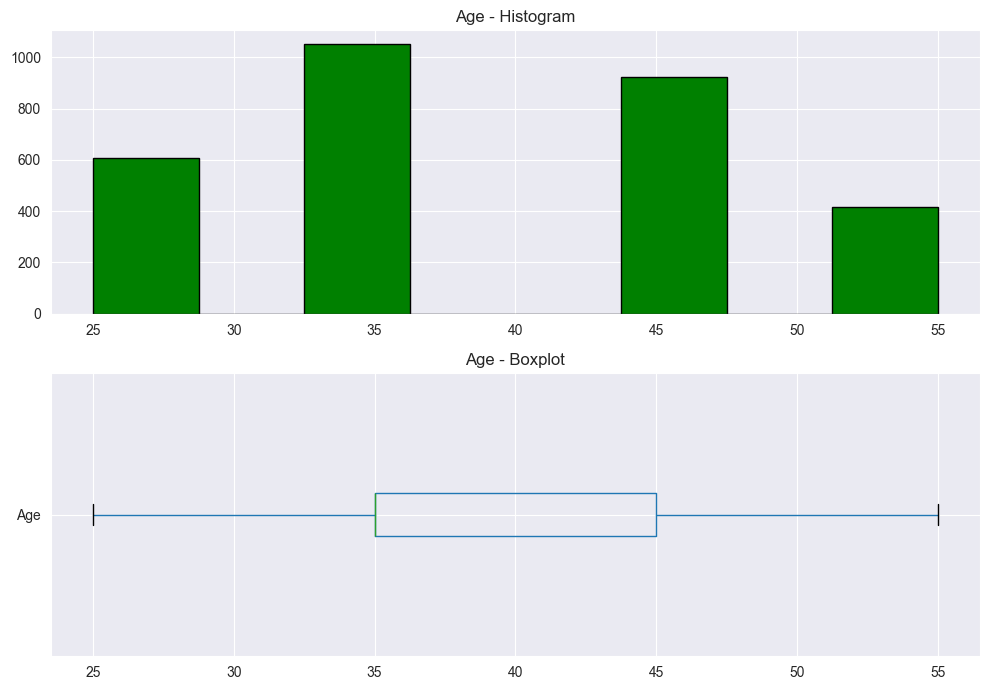

In [52]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))

df['Age'].hist(bins=8, ax=ax1, color='green', edgecolor='black')
ax1.set_title('Age - Histogram')

df.boxplot(column='Age', ax=ax2, vert=False)
ax2.set_title('Age - Boxplot')

plt.tight_layout()
plt.show()

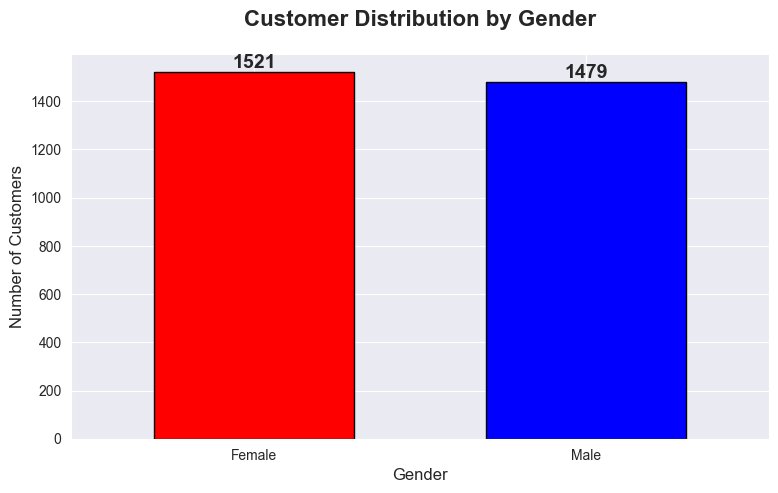

In [57]:
(df['Gender'].value_counts()
               .plot(kind='bar', figsize=(9,5), color=['red', 'blue'], edgecolor='black', width=0.6))

plt.title('Customer Distribution by Gender', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
for i, val in enumerate(df['Gender'].value_counts()):
    plt.text(i, val , str(val), ha='center', va='bottom', fontsize=14, fontweight='bold')
plt.show()

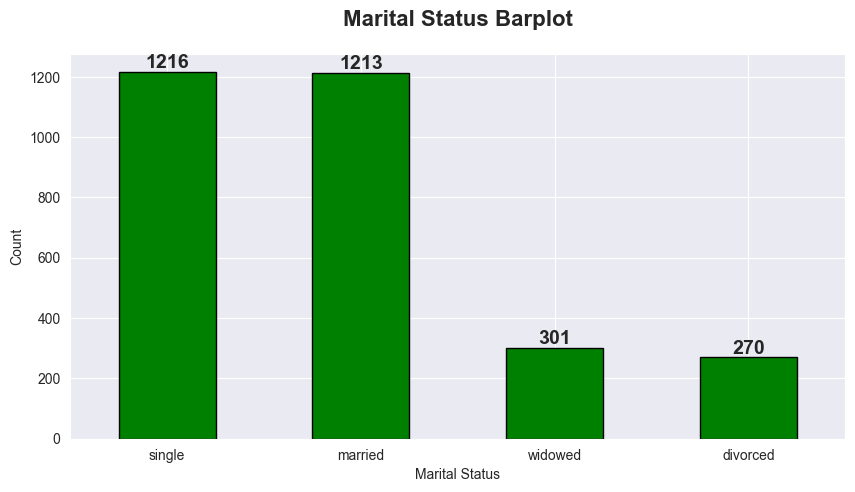

In [58]:
(df['MaritalStatus'].value_counts()
                     .plot(kind='bar', figsize=(10,5), color='green', edgecolor='black'))
plt.title('Marital Status Barplot', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, val in enumerate(df['MaritalStatus'].value_counts()):
    plt.text(i , val , str(val), ha='center', va='bottom', fontsize=14, fontweight='bold'  )
plt.show()

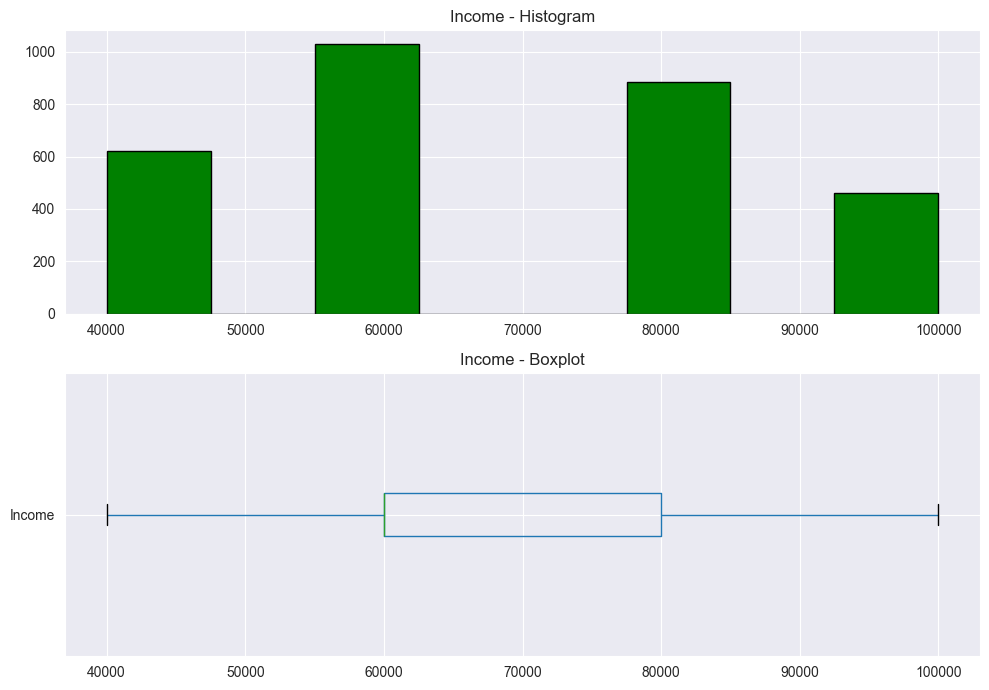

In [59]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))

df['Income'].hist(bins=8, ax=ax1, color='green', edgecolor='black')
ax1.set_title('Income - Histogram')

df.boxplot(column='Income', ax=ax2, vert=False)
ax2.set_title('Income - Boxplot')

plt.tight_layout()
plt.show()


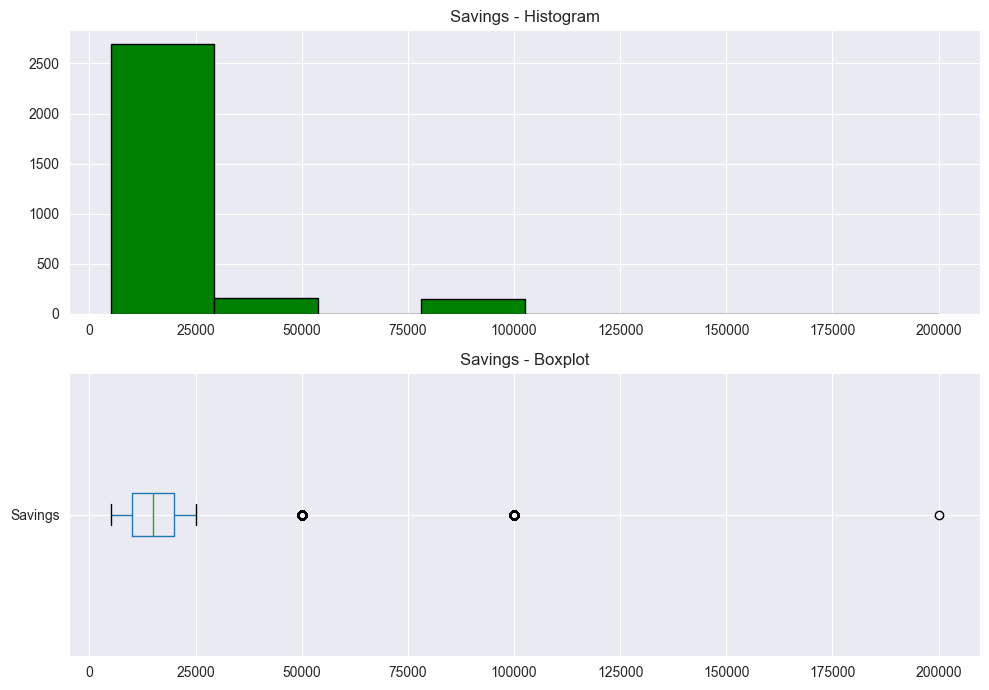

In [60]:
#There are 3 significant outlier in the Savings Boxplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))

df['Savings'].hist(bins=8, ax=ax1, color='green', edgecolor='black')
ax1.set_title('Savings - Histogram')

df.boxplot(column='Savings', ax=ax2, vert=False)
ax2.set_title('Savings - Boxplot')

plt.tight_layout()
plt.show()

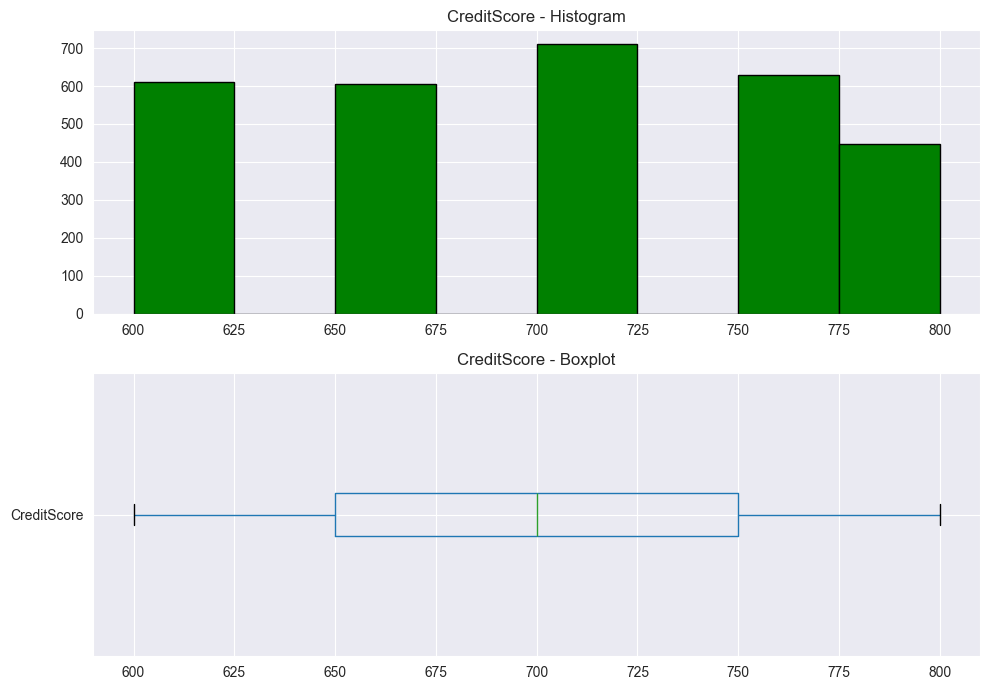

In [61]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))

df['CreditScore'].hist(bins=8, ax=ax1, color='green', edgecolor='black')
ax1.set_title('CreditScore - Histogram')

df.boxplot(column='CreditScore', ax=ax2, vert=False)
ax2.set_title('CreditScore - Boxplot')

plt.tight_layout()
plt.show()

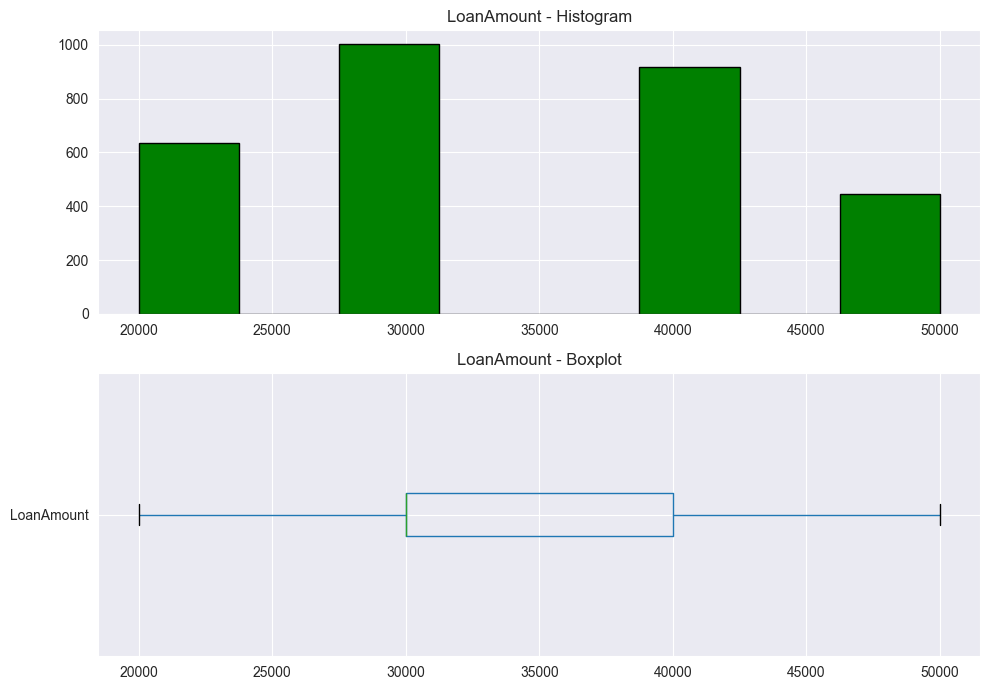

In [62]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))

df['LoanAmount'].hist(bins=8, ax=ax1, color='green', edgecolor='black')
ax1.set_title('LoanAmount - Histogram')


df.boxplot(column='LoanAmount', ax=ax2, vert=False)
ax2.set_title('LoanAmount - Boxplot')

plt.tight_layout()
plt.show()

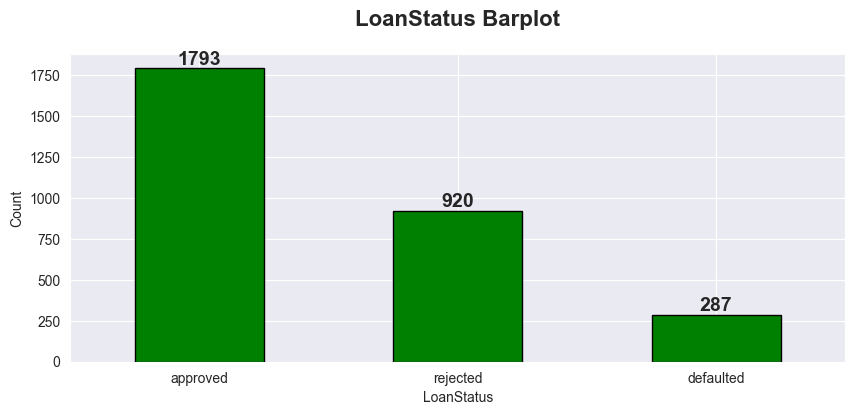

In [63]:
df['LoanStatus'].value_counts().plot(kind='bar', alpha=1, figsize=(10,4), color='green', edgecolor='black')
plt.title('LoanStatus Barplot', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('LoanStatus')
plt.ylabel('Count')
for i, val in enumerate(df['LoanStatus'].value_counts()):
    plt.text(i, val  , str(val), ha='center', va='bottom', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.show()


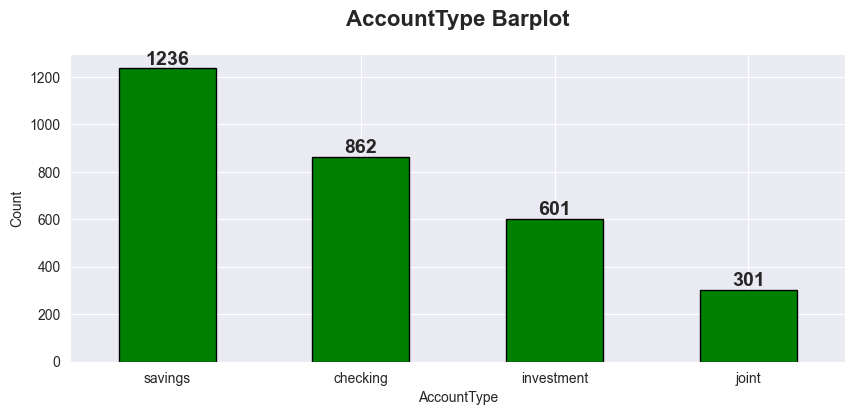

In [64]:
df['AccountType'].value_counts().plot(kind='bar', alpha=1, figsize=(10,4), color='green', edgecolor='black')
plt.title('AccountType Barplot', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('AccountType')
plt.ylabel('Count')
for i, val in enumerate(df['AccountType'].value_counts()):
    plt.text(i, val  , str(val), ha='center', va='bottom', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.show()

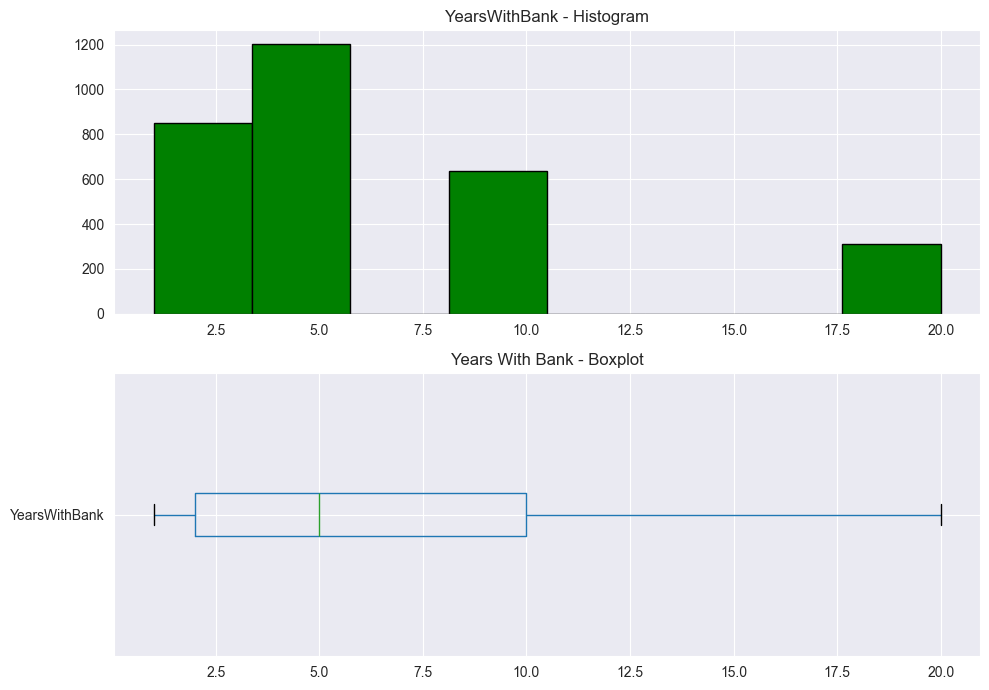

In [65]:
#There is an extreme outlier from the boxplot YearsWithBank=100
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))

df['YearsWithBank'].hist(bins=8, ax=ax1, color='green', edgecolor='black')
ax1.set_title('YearsWithBank - Histogram')

df.boxplot(column='YearsWithBank', ax=ax2, vert=False)
ax2.set_title('Years With Bank - Boxplot')

plt.tight_layout()
plt.show()

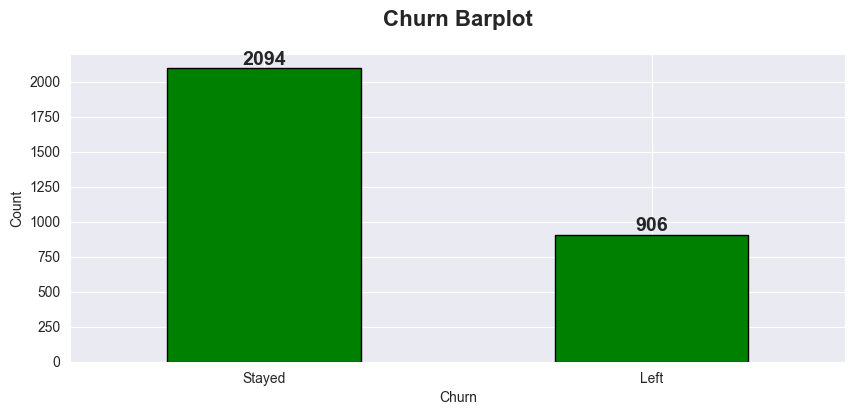

In [66]:
df['Churn'].value_counts().plot(kind='bar', figsize=(10,4), color='green', edgecolor='black')
plt.title('Churn Barplot', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Churn')
plt.ylabel('Count')
for i, val in enumerate(df['Churn'].value_counts()):
    plt.text(i, val  , str(val), ha='center', va='bottom', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.show()



In [67]:
df.query('YearsWithBank>20') #Running the query to detect the outlier and change the value to 10

,Age,Gender,MaritalStatus,Income,Savings,CreditScore,LoanAmount,LoanStatus,AccountType,YearsWithBank,Churn


In [68]:
df['YearsWithBank'].nlargest(5)       #Obvious type error

10    20.0
35    20.0
57    20.0
64    20.0
72    20.0
Name: YearsWithBank, dtype: float64

In [50]:
df['YearsWithBank'] = df['YearsWithBank'].replace(100, 10)

# MultiVariate Analysis


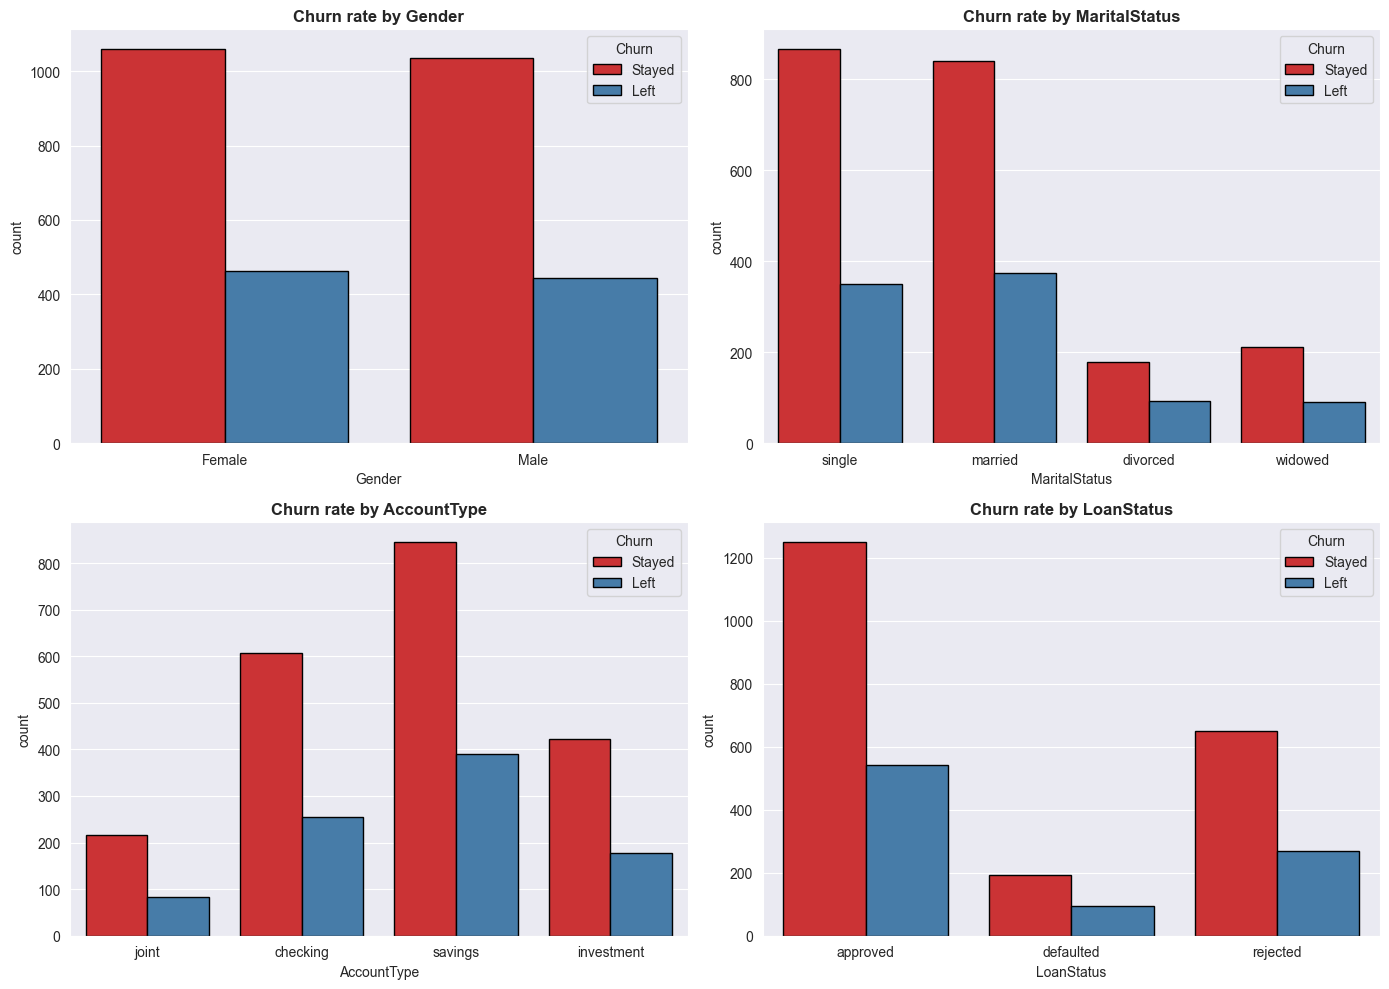

In [69]:
cat_cols = ['Gender', 'MaritalStatus', 'AccountType', 'LoanStatus']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i], palette='Set1', edgecolor='black')
    axes[i].set_title(f'Churn rate by {col}', fontweight='bold')
    axes[i].legend(title='Churn')
plt.tight_layout()
plt.show()

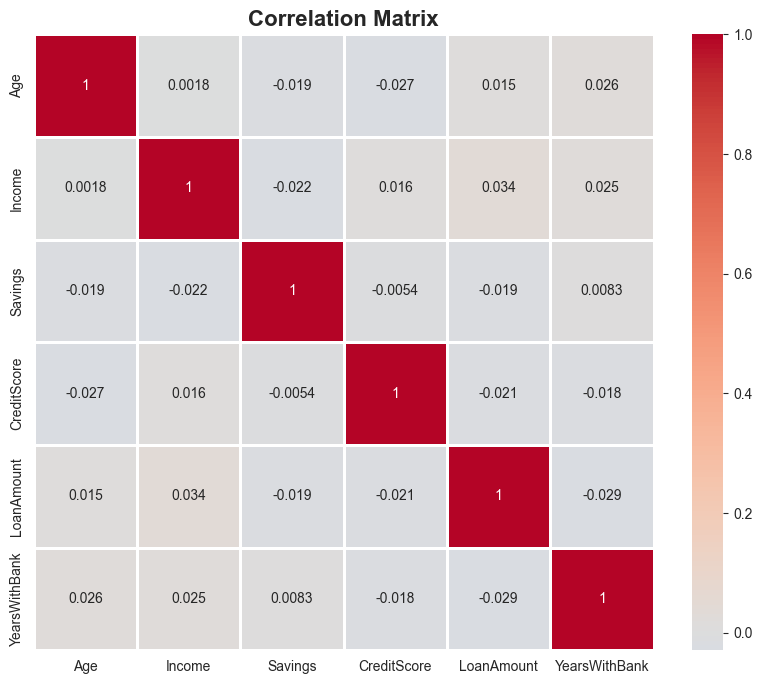

In [70]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0, linewidths=1)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()

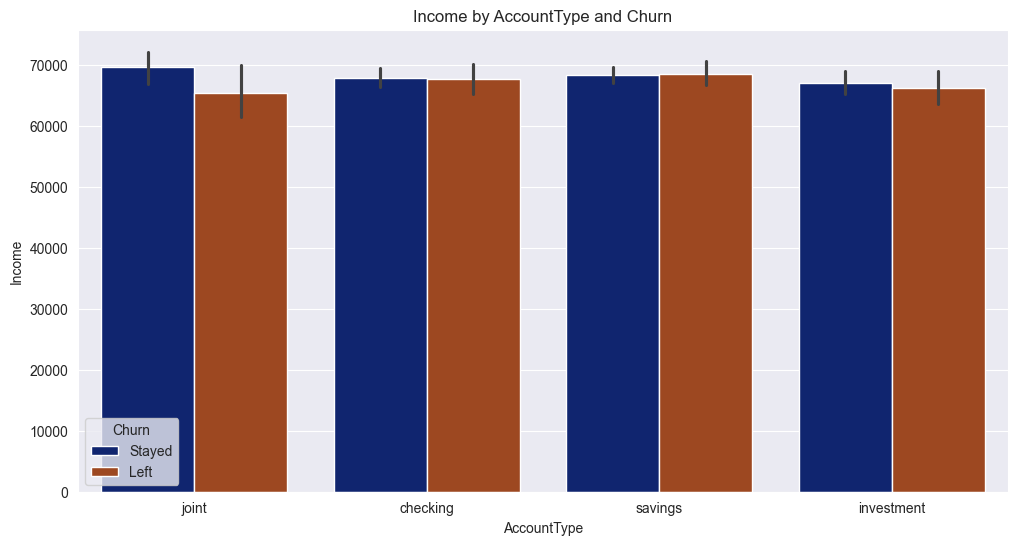

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='AccountType', y='Income', hue='Churn', palette='dark')
plt.title('Income by AccountType and Churn')
plt.show()

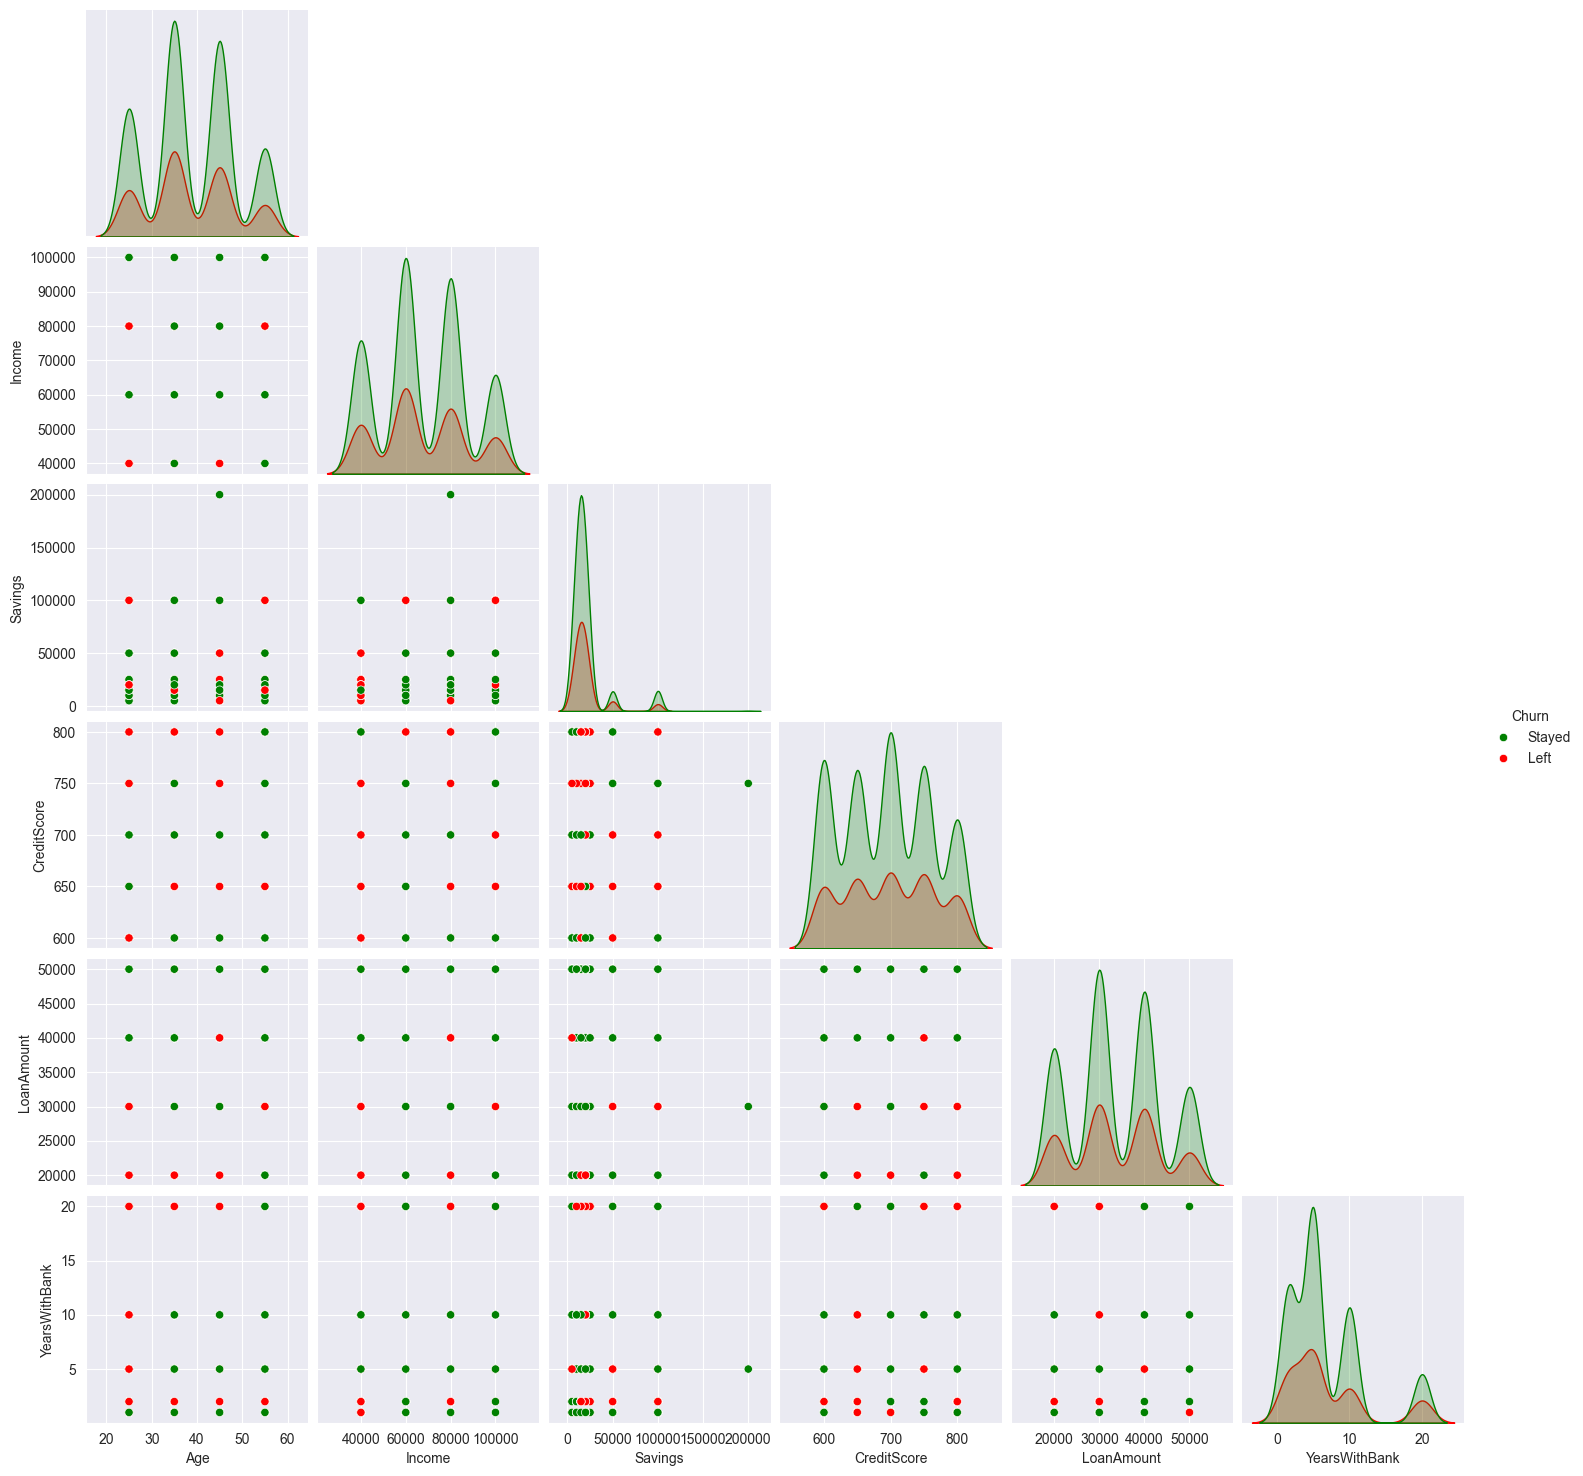

In [72]:
sns.pairplot(df, hue='Churn', corner=True, diag_kind='kde', palette={'Stayed': 'green', 'Left': 'red'})
plt.show()

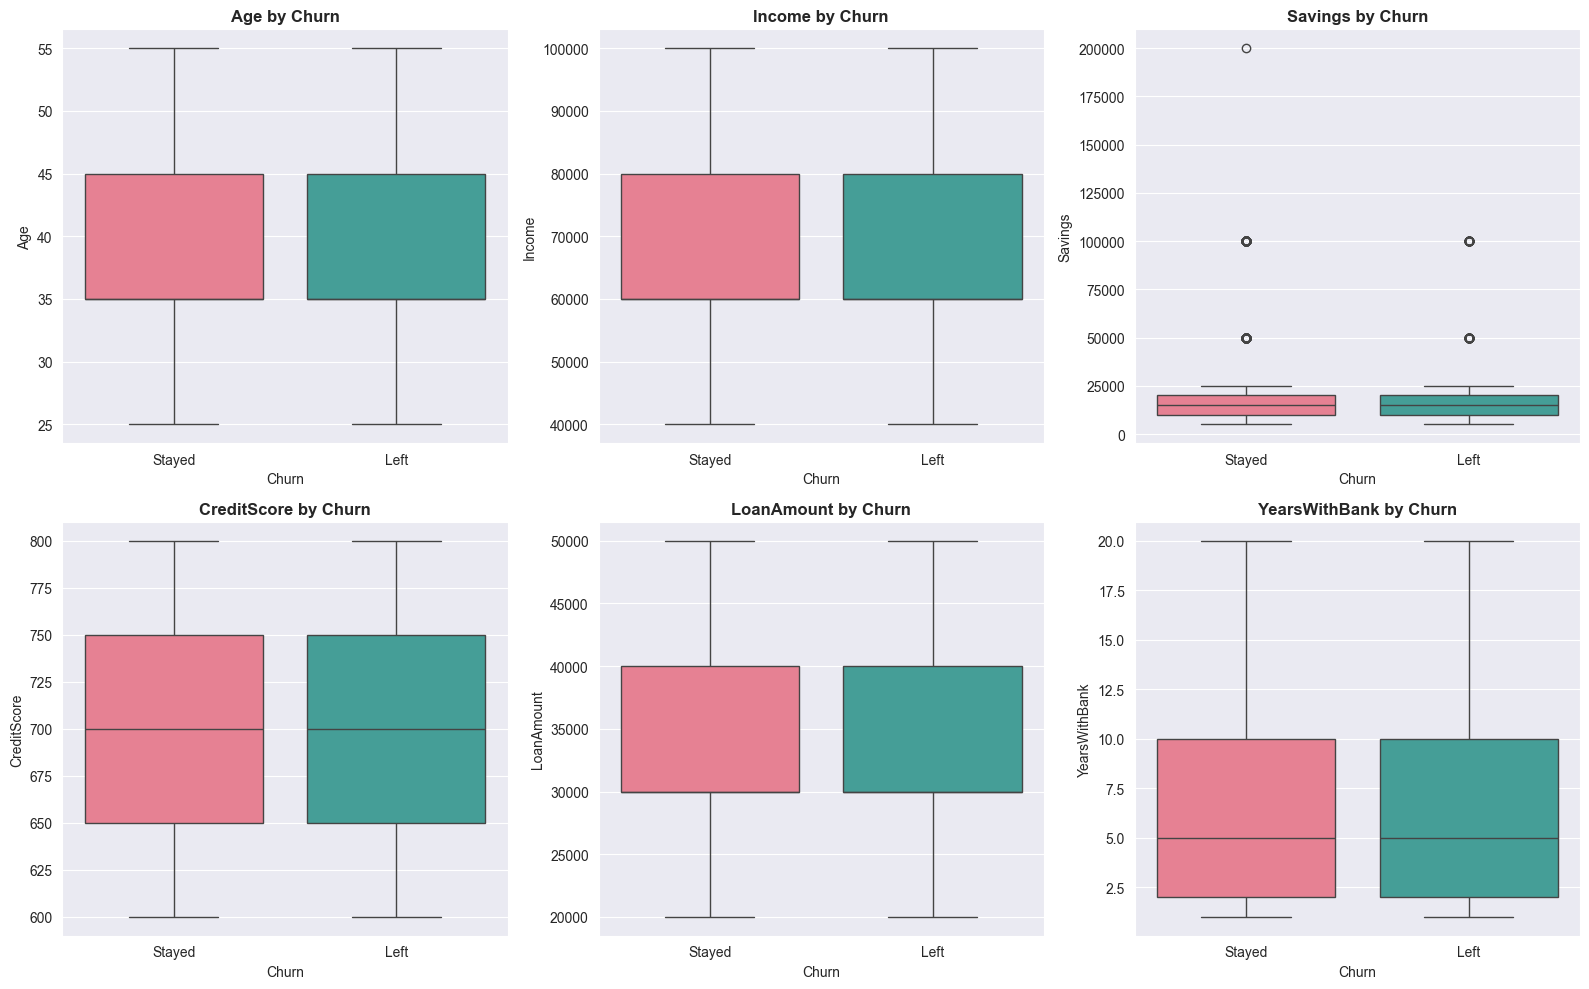

In [73]:
num_cols = ['Age', 'Income', 'Savings', 'CreditScore', 'LoanAmount', 'YearsWithBank']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x='Churn', y=col, ax=axes[i], palette='husl', hue='Churn')
    axes[i].set_title(f'{col} by Churn', fontweight='bold')
plt.tight_layout()
plt.show()

In [74]:
#Information Gain Technique
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder


In [75]:
#We Label the Churn Category with Stayed=0 and Left=1
y = df['Churn'].map({'Stayed': 0, 'Left': 1})


In [76]:
#Create a copy with the features and keep the initial Dataframe intact
features = ['Age','Gender','MaritalStatus','Income','Savings',
            'CreditScore','LoanAmount','LoanStatus','AccountType','YearsWithBank']

X = df[features].copy()

In [77]:
#Encoding the categorical variables
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

In [78]:
mi_scores = mutual_info_classif(X, y, random_state=42) #The Hitchhiker’s Guide to the Galaxy
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

In [79]:
print("Mutual Information Scores:")
print(mi_scores)
print(mi_scores.round(5))

Mutual Information Scores:
MaritalStatus    0.011949
Income           0.009813
LoanAmount       0.008752
AccountType      0.005052
Gender           0.004564
Age              0.002895
CreditScore      0.000906
Savings          0.000342
LoanStatus       0.000000
YearsWithBank    0.000000
dtype: float64
MaritalStatus    0.01195
Income           0.00981
LoanAmount       0.00875
AccountType      0.00505
Gender           0.00456
Age              0.00290
CreditScore      0.00091
Savings          0.00034
LoanStatus       0.00000
YearsWithBank    0.00000
dtype: float64




#                                                                                        # Conclusion

After importing the data, we handled the missing values and impute them with the median.

The Gender columns was reformed with only 2 values(Male, Female), and also checked the dataset or duplicates. We also corrected an outlier in the YearsWithBank column.


The Univariate Analysis was the first sign that something is wrong with the dataset. For example the Age & Income columns have only 4 categories each.


The Correlation Heatmap also showed very weak linear correlation between the numerical columns.

The scatter plot matrix shows complete overlap between Stayed and Left classes across all variable pairs. No visual separability exists, confirming the absence of predictive patterns in the data.


The Boxplots in references with the target columns 'Churn' were in all case similar and overlapping  each other.


The Information Gain of all features was practically zero (max 0.0042), meaning they provide almost no information about whether a customer will churn or stay.


It would be recommended to exam new features, which perhaps be more relevant with the decision of the client to Stay or Leave the Bank.


This dataset can not predict a clients decision.